In [96]:
import pandas as pd
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split , RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report , accuracy_score
import numpy as np

In [97]:
df = pd.read_csv("heart_cleveland_upload.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


In [98]:
#Check the type of data variable
df.dtypes

age            int64
sex            int64
cp             int64
trestbps       int64
chol           int64
fbs            int64
restecg        int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
thal           int64
condition      int64
dtype: object

In [99]:
#Display last five rows of the dataset
df.tail(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0
296,35,1,3,126,282,0,2,156,1,0.0,0,0,2,1


In [100]:
#Experiment with the database by attempting to distinguish presence (values 1,2,3,4) from absence (value 0)
# Create binary target variable: 1 if disease present, 0 otherwise
df['heart_disease_binary'] = df['condition'].apply(lambda x: 1 if x > 0 else 0)


In [101]:
#Change instances with labels 2,3 and to 1.
# df['condition'] = df['condition'].apply(lambda x: 1 if x in [2, 3,4] else x)

In [102]:
#The feature 'ca' has missing values that are given as '?'. Let us replace the '?' with nan and then fill those missing values using 'mean' imputation strategy.
df['ca'] = df['ca'].replace('?', np.nan)
imputer = SimpleImputer(strategy="mean")
df["ca"] = imputer.fit_transform(df[["ca"]])

In [103]:
#Remove the target variable from heart_data
X = df.drop(["condition","heart_disease_binary"],axis = 1)
y = df["heart_disease_binary"]
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition,heart_disease_binary
0,69,1,0,160,234,1,2,131,0,0.1,1,1.0,0,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2.0,0,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0.0,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1.0,0,1,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0.0,2,1,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0.0,2,1,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0.0,2,1,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0.0,0,0,0


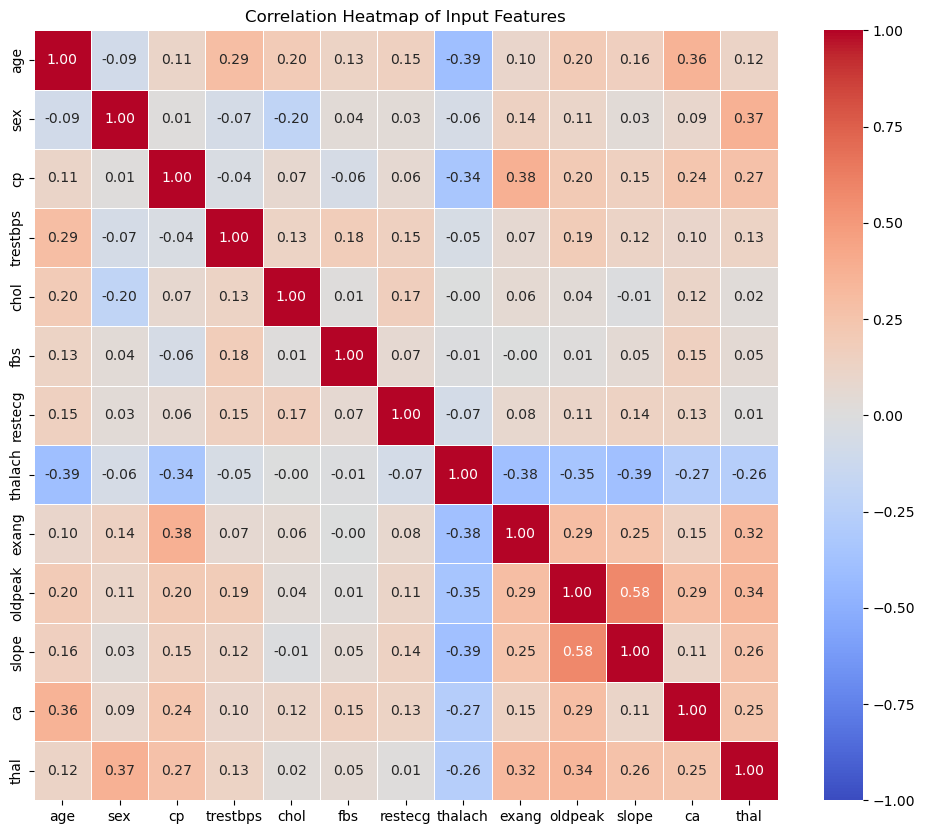

In [104]:
#Draw a heatmap to understand the correlation between Input features
correlation_matrix = X.corr()
plt.figure(figsize=(12, 10))  # Adjust the size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Input Features')
plt.show()

In [105]:
#Split the data for training and testing at 80:20
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)

In [106]:
#Normalizing features for training using Standardscaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [107]:
#Perform Classification using logistic regression and calculate the training score
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
train_score = model.score(X_test_scaled, y_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,model.predict(X_test_scaled)))
print(f"Training Score: {train_score}")

0.9166666666666666
Training Score: 0.9166666666666666


In [108]:
#Prepare a confusion matrix and classification report (accuracy, precision etc) for the same
y_pred = model.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, y_pred)

In [109]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92        29
           1       0.96      0.87      0.92        31

    accuracy                           0.92        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60



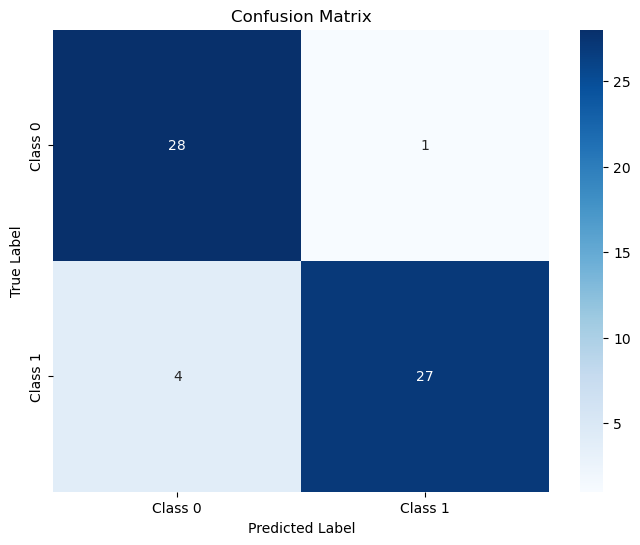

In [110]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [111]:
#Can you do a Hyperparameter tuning of the logistic regression model with RandomizedSearchCV and GridSearchCV?
logreg = LogisticRegression(max_iter=1000)

param_dist = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

random_search = RandomizedSearchCV(
    logreg, param_distributions=param_dist, 
    n_iter=10, cv=5, verbose=1, random_state=42, n_jobs=-1
)

random_search.fit(X_train_scaled, y_train)

print("Best parameters found: ", random_search.best_params_)
print("Best score found: ", random_search.best_score_)

best_logreg_random = random_search.best_estimator_
y_pred_random = best_logreg_random.predict(X_test_scaled)
accuracy_random = accuracy_score(y_test, y_pred_random)
print(f"Test Accuracy (RandomizedSearchCV): {accuracy_random:.2f}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found:  {'solver': 'saga', 'penalty': 'l2', 'C': 0.08858667904100823}
Best score found:  0.8182624113475176
Test Accuracy (RandomizedSearchCV): 0.92


In [112]:
logreg = LogisticRegression(max_iter=1000)

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(
    logreg, param_grid=param_grid, 
    cv=5, verbose=1, n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", grid_search.best_score_)

best_logreg_grid = grid_search.best_estimator_
y_pred_grid = best_logreg_grid.predict(X_test_scaled)
accuracy_grid = accuracy_score(y_test, y_pred_grid)
print(f"Test Accuracy (GridSearchCV): {accuracy_grid:.2f}")


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters found:  {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Best score found:  0.8308510638297874
Test Accuracy (GridSearchCV): 0.88
